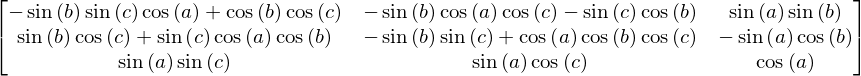

In [75]:
# 第一回転規準: z-x-z
AAA = Matrix([[ cos(c),-sin(c),0],
            [sin(c),cos(c),0],
            [0,0,1]])
BBB = Matrix([[1,0,0],
            [0, cos(a),-sin(a)],
            [0, sin(a),cos(a)]])
CCC = Matrix([[ cos(b),-sin(b),0],
            [ sin(b),cos(b),0],
            [0,0,1]])
AI = CCC*BBB*AAA
AI

In [76]:
# sin(a)*sin(c) = cos(ap)となるようなapを求めたい。
sina = math.sin(ea)
cosa = math.cos(ea)
sinb = math.sin(eb)
cosb = math.cos(eb)
sinc = math.sin(ec)
cosc = math.cos(ec)

# atan2はsin、cosを引数として角度を返す。
ap = math.acos(sina*sinc)
cp = math.atan2(sina*cosc, cosa)
bp = math.atan2(-sinb*sinc*cosa+cosb*cosc, -sinb*cosc-sinc*cosa*cosb)
print(A1(ap,bp,cp)@intra2)


[[-0.5325 -0.5089  0.0651 -0.0849]
 [-0.5183  0.5299 -0.0007  0.0009]
 [-0.5403  0.5517 -0.0007  0.0009]]


In [127]:
import numpy as np
import math
# TIP4Pの座標系
angle,holen,colen = 104.52,0.9572,0.15
wh = 1.0
wo = 16.0
wm = wh + wh + wo
rangle = angle*math.pi/360
ohz=holen*math.cos(rangle)
hyl=holen*math.sin(rangle)
hzl=wo*ohz/wm
ol=-ohz+hzl
cl=colen+ol
# 分子内の原子位置
intra = np.array([[0,hyl,hzl],
                  [0,-hyl,hzl],
                  [0,0,ol],
                  [0,0,cl]]).T
# 分子内座標の、軸を交換したもの
intra2 = np.zeros_like(intra)
intra2[0] = intra[1]
intra2[1] = intra[2]
intra2[2] = intra[0]

# 2分子の座標を読みこむ。
file = open("test.nx3a")
# file = open("1234.0.nx3a")
while True:
    line = file.readline()
    if len(line) == 0:
        break
    if "@NX3A" in line:
        line = file.readline()
        nmol = int(line)
        pos = []
        for i in range(nmol):
            line = file.readline()
            pos.append([float(x) for x in line.split()])
        pos = np.array(pos)
    if "@BOX3" in line:
        line = file.readline()
        cell = np.diag(np.array([float(x) for x in line.split()]))
        celli = np.linalg.inv(cell)

lc = [0 for i in range(nmol)]
        
from sympy import *

# おまじない
init_printing()

a,b,c=symbols('a b c')

B = Matrix([[ cos(c),-sin(c),0],
            [ sin(c), cos(c),0],
            [0,0,1]])
C = Matrix([[1,0,0],
            [0, cos(a),-sin(a)],
            [0, sin(a), cos(a)]])
D = Matrix([[ cos(b),-sin(b),0],
            [ sin(b), cos(b),0],
            [0,0,1]])
AI = D*C*B


# 解析的に回転行列を角度で微分し、それをpythonの関数とする。
A1 = lambdify([a,b,c],AI)
A1a = lambdify([a,b,c],diff(AI,a))
A1b = lambdify([a,b,c],diff(AI,b))
A1c = lambdify([a,b,c],diff(AI,c))
A1aa = lambdify([a,b,c],diff(AI,a,a))
A1bb = lambdify([a,b,c],diff(AI,b,b))
A1cc = lambdify([a,b,c],diff(AI,c,c))
A1ab = lambdify([a,b,c],diff(AI,a,b))
A1bc = lambdify([a,b,c],diff(AI,b,c))
A1ca = lambdify([a,b,c],diff(AI,c,a))



def conv_euler(ea,eb,ec):
    sina=math.sin(ea)
    sinb=math.sin(eb)
    sinc=math.sin(ec)
    cosa=math.cos(ea)
    cosb=math.cos(eb)
    cosc=math.cos(ec)

    ap = math.acos(sina*sinc)
    cp = math.atan2(sina*cosc, cosa)
    bp = math.atan2(-sinb*sinc*cosa+cosb*cosc, -sinb*cosc-sinc*cosa*cosb)
    return ap,bp,cp


#for i in range(nmol):
#    for j in range(i):
#        print("distance {0}-{1}".format(i,j))
#        print(np.linalg.norm(pos[i][0:3]-pos[j][0:3]))

# 回転行列に分子内座標をかけたもの。原子の重心からの空間座標
D0 = np.zeros([nmol,3,4])
# 回転行列の、角度による一階微分に、分子内座標をかけたもの。
# D1 == dR_i / da_i
D1 = np.zeros([nmol,3,3,4]) # molecule, euler angle, vectors, sites
# 回転行列の、角度による二階微分に、分子内座標をかけたもの。
# D2 == d^2 R_i / da db
D2 = np.zeros([nmol,3,3,3,4]) # molecule, euler angle1, angle2, vectors, sites

for i in range(nmol):
    ea,eb,ec = pos[i][3:6]
    # print("criteria", abs(math.sin(ea)))
    if abs(math.sin(ea)) > 0.0:
        D0[i] = A1(ea,eb,ec) @ intra
        D1[i,0] = A1a(ea,eb,ec) @ intra
        D1[i,1] = A1b(ea,eb,ec) @ intra
        D1[i,2] = A1c(ea,eb,ec) @ intra
        D2[i,0,0] = A1aa(ea,eb,ec) @ intra
        D2[i,1,1] = A1bb(ea,eb,ec) @ intra
        D2[i,2,2] = A1cc(ea,eb,ec) @ intra
        D2[i,0,1] = A1ab(ea,eb,ec) @ intra
        D2[i,1,2] = A1bc(ea,eb,ec) @ intra
        D2[i,2,0] = A1ca(ea,eb,ec) @ intra
        D2[i,1,0] = D2[i,0,1]
        D2[i,2,1] = D2[i,1,2]
        D2[i,0,2] = D2[i,2,0]
    else:
        ea,eb,ec = conv_euler(ea,eb,ec)
        pos[i][3:6] = ea,eb,ec
        lc[i] = 1 # rotation order of second kind
        D0[i] = A1(ea,eb,ec) @ intra2
        D1[i,0] = A1a(ea,eb,ec) @ intra2
        D1[i,1] = A1b(ea,eb,ec) @ intra2
        D1[i,2] = A1c(ea,eb,ec) @ intra2
        D2[i,0,0] = A1aa(ea,eb,ec) @ intra2
        D2[i,1,1] = A1bb(ea,eb,ec) @ intra2
        D2[i,2,2] = A1cc(ea,eb,ec) @ intra2
        D2[i,0,1] = A1ab(ea,eb,ec) @ intra2
        D2[i,1,2] = A1bc(ea,eb,ec) @ intra2
        D2[i,2,0] = A1ca(ea,eb,ec) @ intra2
        D2[i,1,0] = D2[i,0,1]
        D2[i,2,1] = D2[i,1,2]
        D2[i,0,2] = D2[i,2,0]

# ***2
for i in range(nmol):
    ea,eb,ec = pos[i][3:6]
    #print("***2",i,A1(ea,eb,ec)[0,1])
    #print("***3",i,A1a(ea,eb,ec)[0,1])
# Tanaka programでの配列要素(1,2)は、Pythonでは[0,1]になる。
# 以後、縦横を精査。

In [128]:
# 当面、田中プログラムとの照合のために、エネルギーの単位は、水素2原子が1 Aにいる時のCoulomb力を1とする。
# 最終的にはもっと汎用の書き方にする。

def di(r, f_r):
    """
    粒子i,jの距離r = |r_i - r_j|の関数f(r)を、iの位置ベクトルr_iで一階微分する。
    f_r,は距離での一階微分
    答は3-ベクトル
    """
    return f_r*(r/np.linalg.norm(r))

# このあたりの関数も、できればsympyに生成させたい。
def dxixi(r, f_r, f_rr):
    # r is a vector
    rL2 = r@r
    rL = rL2**0.5
    return f_r*(1 - r**2 / rL2) / rL + f_rr*r**2 / rL2

def dxiyi(r, f_r, f_rr):
    # r is a vector
    rL2 = r@r
    rL = rL2**0.5
    yz = -f_r*r[1]*r[2]/(rL2*rL) + f_rr*r[1]*r[2]/rL2
    zx = -f_r*r[2]*r[0]/(rL2*rL) + f_rr*r[2]*r[0]/rL2
    xy = -f_r*r[0]*r[1]/(rL2*rL) + f_rr*r[0]*r[1]/rL2
    return yz,zx,xy

def dii(r, f_r, f_rr):
    """
    粒子i,jの距離r = |r_i - r_j|の関数f(r)を、iの位置ベクトルr_iで二階微分する。
    f_r, f_rrは距離での一階、二階微分
    答は3x3行列。
    """
    H = np.zeros((3,3))
    vxx,vyy,vzz = dxixi(r, f_r, f_rr)
    H[0,0] += vxx
    H[1,1] += vyy
    H[2,2] += vzz

    vyz,vzx,vxy = dxiyi(r, f_r, f_rr)
    H[0,1] += vxy
    H[1,2] += vyz
    H[0,2] += vzx
    H[1,0] += vxy
    H[2,1] += vyz
    H[2,0] += vzx
    return H



# 相互作用関数。定数はすべて省略してあるが、定数は微分しても不変なのであとで定数をかけるだけでいい。
def phic(rL):
    """
    Coulomb, raw
    """
    return 1/rL

# 距離による一階微分
def phic_r(rL):
    """
    Coulomb, first derivative
    """
    return -1/rL**2

# 距離による二階微分
def phic_rr(rL):
    """
    Coulomb, second derivative
    """
    return 2/rL**3

def phiLJ(r,a1,a2):
    """
    Lennard-Jones, raw
    """
    rL2 = r@r
    return a1/rL2**6 - a2/rL2**3

def phiLJ_r(r,a1,a2):
    """
    Lennard-Jones, first derivative
    """
    rL2 = r@r
    rL = rL2**0.5
    return -12*a1/rL**13 + 6*a2/rL**7

def phiLJ_rr(r,a1,a2):
    """
    Lennard-Jones, second derivative
    """
    rL2 = r@r
    return 12*13*a1/rL2**7 - 6*7*a2/rL2**4


rout = 8.5
trans = 2.0
rin  = rout - trans

x,y = symbols('x y')
# F0 is a truncation function ranged in [0,1]
F0 = -(x-1)**3*(6*x**2+3*x+1)
# 関数区間を変更
F = F0.subs(x,(y-rin)/trans)
# 解析的な微分を、数値関数に変換する

# Truncation function, raw
Trunc = lambdify([y], F)

# Truncation function, first derivative
Trunc_r = lambdify([y], diff(F,y))

# Truncation function, second derivative
Trunc_rr = lambdify([y], diff(F,y,y))

# Trunc(6.5), Trunc(8.5), Trunc_r(6.5), Trunc_r(8.5), Trunc_rr(6.5), Trunc_rr(8.5)
?Trunc

Signature: Trunc(y)
Docstring:
Created with lambdify. Signature:

func(y)

Expression:

-(0.5*y - 4.25)**3*(1.5*y + 6*(0.5*y - 3.25)**2 - 8.75)

Source code:

def _lambdifygenerated(y):
    return (-(0.5*y - 4.25)**3*(1.5*y + 6*(0.5*y - 3.25)**2 - 8.75))


Imported modules:
File:      /Volumes/Shared/github/nma/<lambdifygenerated-214>
Type:      function


In [129]:
# 相互作用と分子形状に関するブロック

# SI unit 2019
Na=6.02214076e23
ee=1.60217662e-19
E0=8.8541878128e-12
UJ = 4.184
qe0 = ee**2/(4*math.pi*E0)*Na/UJ*1e7
qeT = 332.17752e0
sw = (qeT*UJ*1e6/18.0)**0.5/(6.0*math.pi)
# Tanaka's Units
TanakaScale = qeT / qe0
TokJmol = ee**2/(4*math.pi*E0*1e-7)*Na*TanakaScale
print("TanakaScale", TanakaScale)

# 質点の質量
mass = np.array([wh,wh,wo,0.0])

I = np.array([[mass @ np.sum(intra[1:3]**2, axis=0),
               mass @ np.sum(intra[0:3:2]**2, axis=0),
               mass @ np.sum(intra[0:2]**2, axis=0)],
              [mass @ np.sum(intra2[1:3]**2, axis=0),
               mass @ np.sum(intra2[0:3:2]**2, axis=0),
               mass @ np.sum(intra2[0:2]**2, axis=0)]])

charge = [0.52,0.52,0,-1.04]
LJpairs = {(2, 2):(6.0e5*UJ, 6.10e2*UJ)}
CCpairs = dict()
for i,ci in enumerate(charge):
    for j,cj in enumerate(charge):
        cc = ci*cj
        if cc:
            CCpairs[i,j] = cc
            
ep = 0
for im in range(nmol):
    for jm in range(im+1,nmol):
        v = pos[im][:3] - pos[jm][:3]
        v -= cell @ np.floor( celli @ v + 0.5 )
        vL = np.linalg.norm(v)
        # print("vL",vL)
        if vL > rout:
            continue
        if vL > rin:
            ramp = Trunc(vL)
        else:
            ramp = 1.0
        for (i,j),cc in CCpairs.items():
            r = D0[im,:,i] - D0[jm,:,j] + v #verified
            rL = np.linalg.norm(r)
            # ここでkJ/molにしてしまいたいところだが、田中プログラムと照合するのに不便なので内部単位系はいじらない。
            # LJのほうは、kJ/molで計算しておいて、あとでTokJmolで割って内部単位にしてしまえばいい。
            # ここで電荷を掛けたので、内部の数値は田中と異なる。(やむをえない)
            phi = CCpairs[i,j]*phic(rL)*ramp
            ep += phi
        for (i,j),(a1,a2) in LJpairs.items():
            r = D0[im,:,i] - D0[jm,:,j] + v #verified
            rL = np.linalg.norm(r)
            phi = phiLJ(r,a1,a2)*ramp / TokJmol
            ep += phi


        


np.set_printoptions(None)

print("energy (kJ/mol)=",ep*TokJmol/nmol)


TanakaScale 1.0003427429781058
energy (kJ/mol)= 0.03884210006881554


In [130]:
import itertools as itt

# 3x3行列の配列。
Htt = np.zeros([nmol, 3, nmol, 3])
Hrr = np.zeros([nmol, 3, nmol, 3])
Htr = np.zeros([nmol, 3, nmol, 3])

print("energy (kJ/mol)=",ep*TokJmol/nmol)


ep = 0
for im in range(nmol):
    for jm in range(im+1,nmol):
        # 重心間相対ベクトル
        v = pos[im][:3] - pos[jm][:3]
        v -= cell @ np.floor( celli @ v + 0.5 )
        # 重心間距離
        vL = np.linalg.norm(v)
        # print("vL",vL)
        truncated = False
        if vL > rout:
            # 遠すぎる対はパス
            continue
        if vL > rin:
            # カットオフ関数がかかる場合
            ramp = Trunc(vL)
            ramp_r = Trunc_r(vL)
            ramp_rr = Trunc_rr(vL)
            # Tのvによる一階微分(ベクトル)
            Tv = di(v, ramp_r)
            # Truncのvによる二階微分(テンソル)
            Tvv = dii(v, ramp_r, ramp_rr)
            truncated = True
        else:
            # 近距離
            ramp = 1.0
            ramp_r = 0.0
            ramp_rr = 0.0

        # サイト間の相互作用関数の、相対位置ベクトルによる多階微分をあらかじめ配列phisに入れておく。
        phis = dict()
        for (i,j),cc in CCpairs.items():
            if (i,j) not in phis:
                phis[i,j] = [None,0.0,0.0]
            r = D0[im,:,i] - D0[jm,:,j] + v
            rL = np.linalg.norm(r)
            phi    = cc*phic(rL)
            phi_r  = cc*phic_r(rL)
            phi_rr = cc*phic_rr(rL)
            phis[i,j] = r, phi, phi_r, phi_rr
        for (i,j),(a1,a2) in LJpairs.items():
            if (i,j) not in phis:
                phis[i,j] = [None,0.0,0.0]
            r = D0[im,:,i] - D0[jm,:,j] + v
            phi    = phiLJ(r,a1,a2) / TokJmol
            phi_r  = phiLJ_r(r,a1,a2) / TokJmol
            phi_rr = phiLJ_rr(r,a1,a2) / TokJmol
            phis[i,j] = r, phi, phi_r, phi_rr

        # Check EP again
        for (si,sj),(r, phi, phi_r, phi_rr) in phis.items():
            ep += ramp*phi

        # 並進・並進
        H = np.zeros([3,3])
        for (si,sj),(r, phi, phi_r, phi_rr) in phis.items():
            h = dii(r, phi_r, phi_rr)
            #print("sdxx",si,sj,h[0,0]/0.52**2)
            #print("ri",1/np.linalg.norm(r))
            if truncated:
                #print("ramp",ramp, Tvv)
                rL = np.linalg.norm(r)
                h = ramp*h + Tvv*phi
                h += ramp_r*phi_r/(vL*rL) * (np.outer(r,v)+np.outer(v,r))
                #print("OUTER",(np.outer(r,v)+np.outer(v,r))/(vL*rL))
            H += h
        Htt[im, :, im, :] += H
        Htt[jm, :, jm, :] += H
        Htt[im, :, jm, :] -= H
        Htt[jm, :, im, :] -= H
        # print(im,jm,Htt)

        # 次は回転・回転

        for (i,j),(r, phi, phi_r, phi_rr) in phis.items():
            rL = np.linalg.norm(r)

            H = np.zeros([3,3])
            # 式の導出はDerivative.ipynbを参照
            # **2 同じ分子の同じ角度変数の組みあわせ
            for d in range(3):
                h = (phi_r/rL**3*(rL**2 * (r @ D2[im,d,d,:,i] + D1[im,d,:,i] @ D1[im,d,:,i]) -
                                                    (r @ D1[im,d,:,i])**2) +
                                       phi_rr/rL**2*(r @ D1[im,d,:,i])**2)
                Hrr[im,d,im,d] += h*ramp
                h =  (phi_r/rL**3*(rL**2 * (-r @ D2[jm,d,d,:,j] + D1[jm,d,:,j] @ D1[jm,d,:,j]) -
                                                    (-r @ D1[jm,d,:,j])**2) +
                                       phi_rr/rL**2*(-r @ D1[jm,d,:,j])**2)
                Hrr[jm,d,jm,d] += h*ramp
            # **3 同じ分子の異なる角度変数の組みあわせ
            for d1,d2 in itt.combinations(range(3),2):
                h = (phi_r/rL**3*(rL**2 * (r @ D2[im,d1,d2,:,i] + D1[im,d1,:,i] @ D1[im,d2,:,i]) -
                                                      (r @ D1[im,d1,:,i])*(r @ D1[im,d2,:,i])) +
                                         phi_rr/rL**2*(r @ D1[im,d1,:,i])*(r @ D1[im,d2,:,i]))
                Hrr[im,d1,im,d2] += h*ramp
                h = (phi_r/rL**3*(rL**2 * (-r @ D2[jm,d1,d2,:,j] + D1[jm,d1,:,j] @ D1[jm,d2,:,j]) -
                                                      (-r @ D1[jm,d1,:,j])*(-r @ D1[jm,d2,:,j])) +
                                         phi_rr/rL**2*(-r @ D1[jm,d1,:,j])*(-r @ D1[jm,d2,:,j]))
                Hrr[jm,d1,jm,d2] += h*ramp
            # **4 異なる分子の角度変数の組みあわせ
            for id in range(3):
                for jd in range(3):
                    h = -(phi_r/rL**3*(rL**2 * (D1[im,id,:,i] @ D1[jm,jd,:,j]) -
                                                           (r @ D1[im,id,:,i])*(r @ D1[jm,jd,:,j])) +
                                              phi_rr/rL**2*(r @ D1[im,id,:,i])*(r @ D1[jm,jd,:,j]))
                    Hrr[im,id,jm,jd] += h*ramp
            # 下半分はあとでコピーすればいい。

        # 最後に並進・回転

        for (i,j),(r, phi, phi_r, phi_rr) in phis.items():
            rL = np.linalg.norm(r)

            # **5 同じ分子
            for it in range(3):
                for ir in range(3):
                    h = (phi_r/rL**3 * (rL**2*D1[im,ir,it,i] - r[it]*(r @ D1[im,ir,:,i])) +
                                              phi_rr/rL**2 * r[it]*(r @ D1[im,ir,:,i]))
                    if truncated:
                        h = ramp*h + Tv[it]*phi_r/rL*(r @ D1[im,ir,:,i])
                    Htr[im,it,im,ir] += h
            for jt in range(3):
                for jr in range(3):
                    h = (phi_r/rL**3 * (rL**2*D1[jm,jr,jt,j] + r[jt]*(-r @ D1[jm,jr,:,j])) +
                                              phi_rr/rL**2 * -r[jt]*(-r @ D1[jm,jr,:,j]))
                    if truncated:
                        h = ramp*h + Tv[jt]*phi_r/rL*(r @ D1[jm,jr,:,j])
                    Htr[jm,jt,jm,jr] += h
            # **6 異なる分子
            for it in range(3):
                for jr in range(3):
                    h = (phi_r/rL**3 * (rL**2*D1[jm,jr,it,j] - r[it]*(r @ D1[jm,jr,:,j])) +
                                              phi_rr/rL**2 * r[it]*(r @ D1[jm,jr,:,j]))
                    if truncated:
                        h = ramp*h + Tv[it]*phi_r/rL*(r @ D1[jm,jr,:,j])
                    Htr[im,it,jm,jr] -= h
            for jt in range(3):
                for ir in range(3):
                    h = (phi_r/rL**3 * (rL**2*D1[im,ir,jt,i] + r[jt]*(-r @ D1[im,ir,:,i])) +
                                              phi_rr/rL**2 * -r[jt]*(-r @ D1[im,ir,:,i]))
                    if truncated:
                        h = ramp*h + Tv[jt]*phi_r/rL*(r @ D1[im,ir,:,i])
                    Htr[jm,jt,im,ir] -= h
            # 下半分はあとでコピーすればいい。

print("energy (kJ/mol)=",ep*TokJmol/nmol)


np.set_printoptions(4)

# Hrrを一旦3nmol x 3nmolの平たい上半行列に戻し、
Hrr = Hrr.reshape(3*nmol,3*nmol)
# 対称化し、
Hrr = Hrr + Hrr.T - np.diag(Hrr.diagonal())
# また行列の配列に戻す。
Hrr = Hrr.reshape(nmol,3,nmol,3)


# ***1 謎のテンソルの計算
eival = np.zeros([nmol,3])
eivec = np.zeros([nmol,3,3])

for i in range(nmol):
    # 分子内座標での慣性テンソル
    Ii = I[lc[i]] / wm
# wmで割ることで、並進には質量を掛ける必要がなくなる。
# verified rix, riy,riz

    ea,eb,ec = pos[i][3:6]
    sina = math.sin(ea)
    cosa = math.cos(ea)
    sinb = math.sin(eb)
    cosb = math.cos(eb)
    sinc = math.sin(ec)
    cosc = math.cos(ec)
    ev = np.array([[Ii[0]*cosc**2 + Ii[1]*sinc**2, (Ii[0]-Ii[1])*sina*sinc*cosc, 0.0],
                   [(Ii[0]-Ii[1])*sina*sinc*cosc,  (Ii[0]*sinc**2+Ii[1]*cosc**2)*sina**2+Ii[2]*cosa**2, Ii[2]*cosa],
                   [0.0,  Ii[2]*cosa, Ii[2]]])
    #print("***6")
    #print(ev)
    # ev verified
    ival, ivec = np.linalg.eig(ev)
    idx = np.argsort(-ival)
    ival = ival[idx]
    ivec = ivec[:,idx]
    eival[i] = 1/ival**0.5
    eivec[i] = ivec
    # eig verified
    #print("eival")
    #print(eival[i])
    #print("eivec")
    #print(eivec[i])

# rot-rot
for i in range(nmol):
    for j in range(nmol):
        # elements of rot-rot
        t = Hrr[j,:,i,:]
        #print("***4",i,j)
        #print(t)
        t = eivec[j].T @ t @ eivec[i]
        sd = t * np.outer(eival[j],eival[i])
        Hrr[j,:,i,:] = sd
        #print("***5",i,j)
        #print(sd)
        #print()

# rot-trans
for i in range(nmol):
    for j in range(nmol):
        # elements of trans-rot
        t = Htr[i,:,j,:].T
        #print("***7")
        #print(t)
        t = Htr[i,:,j,:]
        t = t @ eivec[j]
        sd = t * eival[j]
        Htr[i,:,j,:] = sd
        #print("***8")
        #print(sd)
        #print()

Hessian = np.zeros([6*nmol, 6*nmol])
Hessian[0*nmol:3*nmol,0*nmol:3*nmol] = Htt.reshape(3*nmol,3*nmol)
Hessian[3*nmol:6*nmol,3*nmol:6*nmol] = Hrr.reshape(3*nmol,3*nmol)
Hessian[0*nmol:3*nmol,3*nmol:6*nmol] = Htr.reshape(3*nmol,3*nmol)
Hessian[3*nmol:6*nmol,0*nmol:3*nmol] = Htr.reshape(3*nmol,3*nmol).T

np.set_printoptions(4)

#print(Hessian/0.52**2)



energy (kJ/mol)= 0.03884210006881554
energy (kJ/mol)= 0.03884210006881554


In [131]:
ival, ivec = np.linalg.eigh(Hessian)

for iv in sorted(ival,reverse=True):
    if iv > 0:
        iv = iv**0.5 * sw
    else:
        iv = -(-iv)**0.5 * sw
    print(iv)


95.18011714359442
44.2507979270288
27.18980399678063
9.887480827730782e-07
5.79563716924399e-07
-6.564938741762731e-07
-3.2567213126119685
-7.482131380620787
-28.6285571437099
-37.195860241136856
-50.656183591544234
-72.48723707456553


## 完了
* 第二回転規準
   * 全部第二規準にすると、全部第二規準とした田中プログラムと同じ答えになることを確認。
   * 一方で、田中プログラム自体、規準を変更すると振動数が変わるのがとても気になる。
   * 回転行列を二種類準備する代わりに、分子内座標を2種類準備することにした。
     * xyz→yzxに変えるようにした。
     * 角度変換規則(euler_conv)は田中のものと結果的には同じであった。たぶん発想は同じ。
     * その場合でも、振動数が微妙に変化する。変化のしかたも同様なので、同じことをやっているにすぎないと思われる。
     * ということは、分子内座標で、分子をどういう向きに置くかによって、結果が変わるということ。
     * Hessianの計算に関しては、あまり疑う余地がないので、mass weightのあたりしか考えられないのだが…。
     * Quenchしてあれば問題がおきないということで合意。Quenchしない場合に変になる理由はわからない。
* LJ
* 多分子
* 周期境界条件
* Truncation
* 特殊な単位系の廃止
* 小さい系(CS2)であれば、現実的な速度で正確な振動を得ることができた。2019-09-26

## 未完
* Hessianの式の自動生成
* 整理し、読みやすくする。

## 別計画

* 数値微分によるHessian計算はどれぐらい現実味があるのか。
   * このプログラムがうまく動くことが確認できれば、比較対象に使える。 


In [ ]:
intra

In [ ]:
intra[1:3] * intra[1:3]

In [ ]:
np.sum(intra[1:3]**2, axis=0) @ mass

In [ ]:
np.outer(np.array([1,2,3]),np.array([1,2,3]))

In [ ]:
np.diag(np.array([1,1,1]))

In [121]:
np.cross(np.array([1,2,3]),np.array([1,2,3]))

array([0, 0, 0])